In [1]:
#This code needs to be run in the phy environment
#When installing jupyternotebook you might have issues with phy environment so be careful with that
import sys, os
import numpy as np
import time
import pickle

import matplotlib.pyplot as plt
from phylib.io.model import load_model
#from phylib.utils.color import selected_cluster_color

sys.path.append('..')
import InsanallyLabEphysTools as ilep

ModuleNotFoundError: No module named 'phylib'

# Extract waveforms from example recording

In [141]:
directory = 'O:\\Sorts\\DualRecording'
animal = 'BS_40'
session = 'BS_40 10'
area = 'AC'

#Setup environment
folder = os.path.join(directory,animal,session,area)
model_params_path = os.path.join(folder,'params.py')
model_params_path_mod = os.path.join(folder,'params_mod_for_waveform_loading_SAFE_TO_DELETE.py')

#Generate corrected params file
with open(model_params_path) as f:
    lines = f.read().splitlines()
lines[0] = f"dat_path = {repr(os.path.join(folder,'temp_wh.dat'))}"

file = open(model_params_path_mod, "w")
[file.write(l+'\n') for l in lines]
file.close()

#Load Data
model = load_model(model_params_path_mod)



#Extract best waveforms
best_waveforms_dict = dict()
clusters = model.cluster_ids
for clust in clusters:
    #Extract raw waveforms
    waveforms = model.get_cluster_mean_waveforms(clust)
    waveforms = waveforms.mean_waveforms[21:,:]
    
    #Nomralize
    baseline_mean = np.mean(waveforms[:5,:],axis=0)
    waveforms_norm = waveforms - baseline_mean
    waveforms_norm /= np.max(np.abs(waveforms_norm))
    
    #Extract best waveform
    max_amp = np.max(np.abs(waveforms_norm),axis=0)
    best_waveform = np.argmax(max_amp)
    best_waveform = waveforms[:,np.argmax(max_amp)]

    #Save
    best_waveforms_dict[clust] = best_waveform

# Iteratively extract waveforms from each session

In [2]:
cache_directory = '../Data/Waveforms_Cache'
data_directory = 'O:\\Sorts\\DualRecording'

In [19]:
animals_list = os.listdir(data_directory)
for animal in animals_list:
    animal_directory = os.path.join(data_directory,animal)
    sessions_list = os.listdir(animal_directory)
    for session in sessions_list:
        session_directory = os.path.join(animal_directory,session)
        areas_list = os.listdir(session_directory)
        ### Remove all non-AC/M2 areas
        areas_list = np.array(areas_list)[np.isin(areas_list,['AC','M2'])]
        for area in areas_list:

            try:
                #Load initial file to get save file name
                initial_sessionfile = ilep.loadSessionInitial(animal_directory,session,area)
    
                #Setup environment
                folder = os.path.join(session_directory,area)
                model_params_path = os.path.join(folder,'params.py')
                model_params_path_mod = os.path.join(folder,'params_mod_for_waveform_loading_SAFE_TO_DELETE.py')
                
                #Generate corrected params file
                with open(model_params_path) as f:
                    lines = f.read().splitlines()
                lines[0] = f"dat_path = {repr(os.path.join(folder,'temp_wh.dat'))}"
                
                file = open(model_params_path_mod, "w")
                [file.write(l+'\n') for l in lines]
                file.close()
                
                #Load Data
                model = load_model(model_params_path_mod)
                
                
                
                #Extract best waveforms
                best_waveforms_dict = dict()
                clusters = model.cluster_ids
                for clust in clusters:
                    #Extract raw waveforms
                    waveforms = model.get_cluster_mean_waveforms(clust)
                    waveforms = waveforms.mean_waveforms[21:,:]
                    
                    #Nomralize
                    baseline_mean = np.mean(waveforms[:5,:],axis=0)
                    waveforms_norm = waveforms - baseline_mean
                    waveforms_norm /= np.max(np.abs(waveforms_norm))
                    
                    #Extract best waveform
                    max_amp = np.max(np.abs(waveforms_norm),axis=0)
                    best_waveform = np.argmax(max_amp)
                    best_waveform = waveforms_norm[:,np.argmax(max_amp)]
                
                    #Save
                    best_waveforms_dict[clust] = best_waveform
    
                #Save cached data
                saveString = ilep.generateSaveString(initial_sessionfile)+'_waveforms.pickle'
                print(saveString)
                with open(os.path.join(cache_directory,saveString), 'wb') as f:
                    pickle.dump(best_waveforms_dict, f, protocol=pickle.HIGHEST_PROTOCOL)
            
            except Exception as e:
                print(f"{os.path.join(session_directory,area)} failed to extract: {e}")
    #         break
    #     break
    # break

AE_229_1_passive_AC_waveforms.pickle
AE_229_2_passive_AC_waveforms.pickle
AE_229_3_passive_AC_waveforms.pickle
AE_229_4_passive_AC_waveforms.pickle
AE_229_5_passive_AC_waveforms.pickle
AE_229_6_passive_AC_waveforms.pickle
Depth mismatch on cluster 0
Depth mismatch on cluster 1
Depth mismatch on cluster 3
Depth mismatch on cluster 4
Depth mismatch on cluster 5
Depth mismatch on cluster 6
Depth mismatch on cluster 8
Depth mismatch on cluster 9
Depth mismatch on cluster 10
Depth mismatch on cluster 11
Depth mismatch on cluster 12
Depth mismatch on cluster 13
Depth mismatch on cluster 14
Depth mismatch on cluster 15
Depth mismatch on cluster 16
Depth mismatch on cluster 17
Depth mismatch on cluster 18
Depth mismatch on cluster 19
Depth mismatch on cluster 20
Depth mismatch on cluster 21
Depth mismatch on cluster 22
Depth mismatch on cluster 23
Depth mismatch on cluster 24
Depth mismatch on cluster 25
Depth mismatch on cluster 26
Depth mismatch on cluster 27
Depth mismatch on cluster 28
Dep

C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_239_13_AC_waveforms.pickle
AE_239_14_AC_waveforms.pickle
AE_239_15_AC_waveforms.pickle
AE_239_2_AC_waveforms.pickle
AE_239_3_AC_waveforms.pickle
AE_239_4_AC_waveforms.pickle
AE_239_5_AC_waveforms.pickle
AE_239_6_AC_waveforms.pickle
AE_239_7_AC_waveforms.pickle
AE_239_8_AC_waveforms.pickle
AE_239_9_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_240\\AE_240 1\\AC\\condition_metadata.json'
AE_240_1_AC_waveforms.pickle
AE_240_10_AC_waveforms.pickle
AE_240_11_AC_waveforms.pickle
AE_240_12_AC_waveforms.pickle
AE_240_13_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_240\\AE_240 2\\AC\\condition_metadata.json'
AE_240_2_AC_waveforms.pickle


C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_240_3_AC_waveforms.pickle
AE_240_4_AC_waveforms.pickle
AE_240_5_AC_waveforms.pickle
AE_240_6_AC_waveforms.pickle
AE_240_7_AC_waveforms.pickle
AE_240_8_AC_waveforms.pickle
AE_240_9_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 1\\AC\\condition_metadata.json'
AE_252_1_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 10\\AC\\condition_metadata.json'
AE_252_10_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 11\\AC\\condition_metadata.json'
AE_252_11_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 12\\AC\\condition_metadata.json'
AE_252_12_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 13\\AC\\condition_metadata.json'
AE_252_13_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualR

C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_252_8_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_252\\AE_252 9\\AC\\condition_metadata.json'
AE_252_9_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_254\\AE_254 1\\AC\\condition_metadata.json'
AE_254_1_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_254\\AE_254 2\\AC\\condition_metadata.json'
AE_254_2_tuning_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_294\\AE_294 1\\AC\\tuning_responsiveness.pickle'
AE_294_1_passive_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_294\\AE_294 2\\AC\\tuning_responsiveness.pickle'
AE_294_2_passive_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_294\\AE_294 3\\AC\\tuning_responsiveness.pickle'


C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_294_3_passive_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_294\\AE_294 4\\AC\\tuning_responsiveness.pickle'
AE_294_4_passive_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_294\\AE_294 5\\AC\\tuning_responsiveness.pickle'


C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_294_5_passive_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 1\\AC\\condition_metadata.json'
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 1\\AC\\cloudy_metadata.json'
AE_301_1_opto_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 10\\AC\\condition_metadata.json'
AE_301_10_opto_control_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 11\\AC\\condition_metadata.json'
AE_301_11_opto_control_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 12\\AC\\condition_metadata.json'
AE_301_12_opto_control_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 13\\AC\\condition_metadata.json'
AE_301_13_opto_control_AC_waveforms.pickle
[Errno 2] No such file or directory: 'O:\\Sorts\\DualRecording\\AE_301\\AE_301 14\\AC\\con

C:\Users\4thgr\AppData\Local\Temp\ipykernel_12144\4018304786.py:46: RuntimeWarning: invalid value encountered in divide
  waveforms_norm /= np.max(np.abs(waveforms_norm))


AE_344_9_opto_AC_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_1_AC_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_1_M2_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_2_AC_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_2_M2_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_3_AC_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_3_M2_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_4_AC_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_4_M2_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials.m to generate
BS_108_5_M2_waveforms.pickle
Recording does not contain raw audio data. Use saveTrials

NotADirectoryError: [WinError 267] The directory name is invalid: 'O:\\Sorts\\DualRecording\\BS_67\\BS_67 4.txt'

In [15]:
with open('..\\Data\\Waveforms_Cache\\AE_229_1_passive_AC_waveforms.pickle', 'rb') as f:
    file = pickle.load(f)

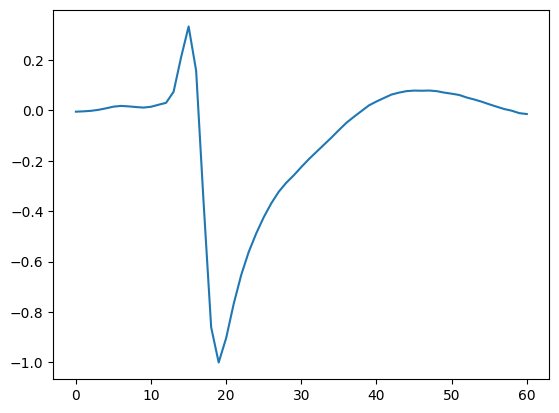

In [16]:
plt.plot(file[0])